In [1]:
## WordCloud

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import os
import glob
import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#os.chdir("../Data/bnb")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_xrp_data.csv", index=False, encoding='utf-8-sig')     
df = pd.read_csv("combined_xrp_data.csv")



In [40]:
df.tail()

,id,conversation_id,created_at,date,time,tweet,hashtags
229465,1447203166374674433,1446554309756432386,2021-10-10 07:11:37 Pacific Daylight Time,2021-10-10,07:11:37,@MarsRise_Bsc @Ashrit01 @Amit854609 @VijayPr71...,"['bnb', 'bitcoin']"
229466,1447203135609466881,1447182773677133830,2021-10-10 07:11:29 Pacific Daylight Time,2021-10-10,07:11:29,@WSecrets_WSC Able to follow this because this...,"['btc', 'bnb', 'wsbetticos']"
229467,1447203129947164676,1447203129947164676,2021-10-10 07:11:28 Pacific Daylight Time,2021-10-10,07:11:28,@Ashrit01 @Amit854609 @VijayPr71947657 @elonmu...,"['bnb', 'bitcoin']"
229468,1447203084854185996,1447203084854185996,2021-10-10 07:11:17 Pacific Daylight Time,2021-10-10,07:11:17,#BSC #Binancen #Airdrop @elonmusk #PancakeSwap...,"['bsc', 'binancen', 'airdrop', 'pancakeswap', ..."
229469,1447203061034745858,1447203061034745858,2021-10-10 07:11:12 Pacific Daylight Time,2021-10-10,07:11:12,"$CGG 🚀🚀🚀 🔥 Gaming, NFT, worlds first NFT mini...","['nft', 'bitc', 'eth', 'bnb', 'bsc', 'uni', 'u..."


In [41]:
print("There are {} observations and {} features in this data set.\n".format(df.shape[0],df.shape[1]))

There are 229470 observations and 7 features in this data set.



In [42]:
?WordCloud

In [44]:
text = df.hashtags
readtext = str(text)


In [45]:
wordcloud = WordCloud().generate(readtext)

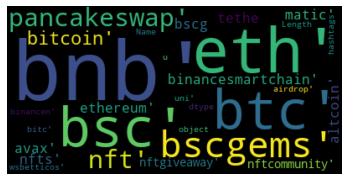

In [46]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

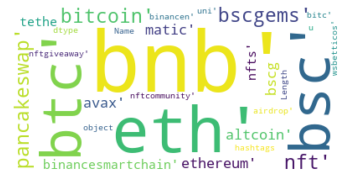

In [47]:
#lower max_font_size, change the max number of words and lighten the background

wordcloud = WordCloud(background_color = "white").generate(readtext)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

In [48]:
stopwords = set(STOPWORDS)
stopwords.update(["name", "length", "dtype", "object", "hashtags", "axs", "airdrops", "airdrop", "giveawayinspector"])

<function matplotlib.pyplot.show(close=None, block=None)>

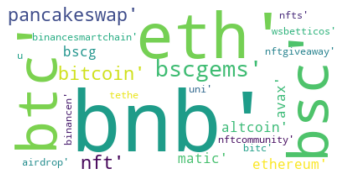

In [49]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size= 100, max_words= 50, background_color="white").generate(readtext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [87]:
bnb_image= np.array(Image.open("bnb.png"))
bnb_image


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

In [89]:
transformed_bnb_image = np.ndarray((bnb_image.shape[0], bnb_image.shape[1]), np.int32)
for i in range (len(bnb_image)):
    transformed_bnb_image[i] = list(map(transform_format, bnb_image[i]))

In [90]:
transformed_bnb_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

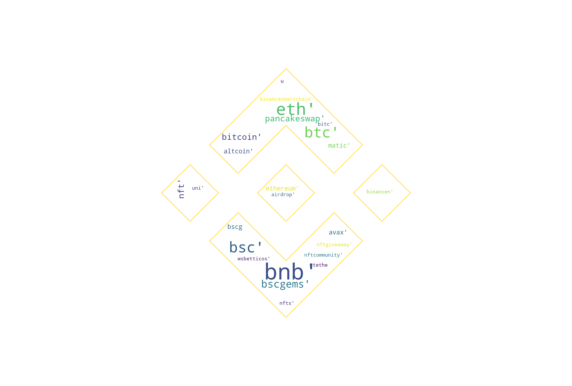

In [93]:
wc=WordCloud(background_color= "white", mask= transformed_bnb_image, stopwords=stopwords, contour_width = 3, contour_color ='gold')
wc.generate(readtext)
wc.to_file("bnb.png")
plt.figure(figsize= [10,10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [66]:
retval = os.getcwd()
print(retval)

C:\Users\liuma\Project_1\Data\bnb
